# Hierarchical Clustering Crime

In [ ]:
# Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.
Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
Crime = pd.read_csv("crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [17]:
Crime.shape

(50, 6)

In [19]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape,cluster
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,1.520000
std,4.35551,83.337661,14.474763,9.366385,1.034901
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,1.000000
50%,7.25000,159.000000,66.000000,20.100000,1.000000
75%,11.25000,249.000000,77.750000,26.175000,2.000000
max,17.40000,337.000000,91.000000,46.000000,3.000000


In [20]:
Crime.isnull().sum() # There is no null vaules in my data set 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
cluster       0
dtype: int64

In [2]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [3]:
crime_norm = norm_func(Crime.iloc[:,1:])
crime_norm


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [4]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Crime.iloc[:,1:]))
data 

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


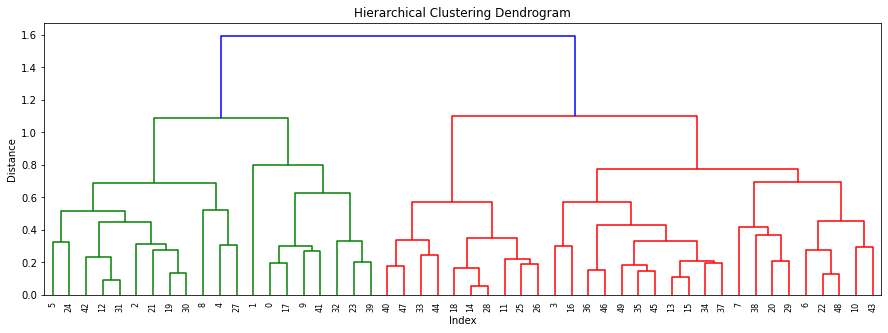

In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(crime_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Crime['cluster']=cluster_labels # creating a  new column and assigning it to new column 
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [8]:
Crime.iloc[:,1:].groupby(Crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape,cluster
cluster,,,,,
0,14.087500,252.750000,53.500000,24.5375,0.0
1,5.715000,132.300000,70.800000,18.1000,1.0
2,3.180000,78.700000,49.300000,11.6300,2.0
3,10.883333,256.916667,78.333333,32.2500,3.0


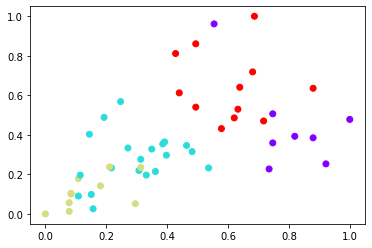

In [11]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(crime_norm) 

h_complete.fit_predict(data)

plt.scatter(x=data[0], y=data[3], c=h_complete.labels_, cmap='rainbow')

In [ ]:
#  you can see the data points in the form of four clusters in the above scatter plot

In [12]:
# No of Records in the cluster 1:-
cluster1=Crime[(Crime.cluster==0)]
cluster1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [13]:
# No of Records in the cluster 2:-
cluster2=Crime[(Crime.cluster==1)]
cluster2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


In [14]:
# No of Records in the cluster 3:-
cluster3=Crime[(Crime.cluster==2)]
cluster3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [15]:
# No of Records in the cluster 4:-
cluster4=Crime[(Crime.cluster==3)]
cluster4

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [39]:
#Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 

#Draw the inferences from the clusters obtained.

#Data Description:
 
#The file EastWestAirlinescontains information on passengers who belong to an airline’s 
#frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in
# the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments 
#for different types of mileage offers

#ID --Unique ID

#Balance--Number of miles eligible for award travel

#Qual_mile--Number of miles counted as qualifying for
 #Topflight status

#cc1_miles -- Number of miles earned with freq. flyer credit card in the
 #past 12 months:
#cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#cc3_miles -- Number 
#of miles earned with Small Business credit card in the past 12 months:

#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over
 #50,000

#Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

#Bonus_trans--Number of non-flight bonus transactions 
#in the past 12 months

#Flight_miles_12mo--Number of flight miles in the past 12 months

#Flight_trans_12--Number of flight transactions in the past
# 12 months

#Days_since_enrolled--Number of days since enrolled in flier program

#Award--whether that person had award flight (free flight) or not


 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [4]:
EW=pd.read_csv("EastWestAirlines.csv")
EW.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
EW.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
EW.isnull().sum() # There is no null vaules in my data set 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
EW_norm1 = norm_func(EW.iloc[:,1:]) # Normalizing the data
EW_norm1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [9]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [10]:
type(EW_norm1) 

pandas.core.frame.DataFrame

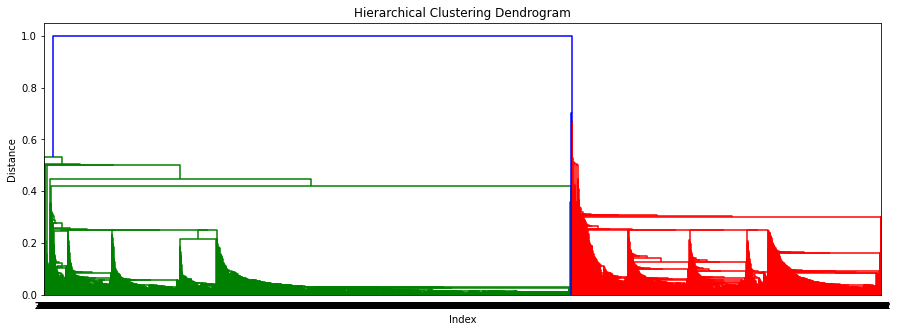

In [12]:
#p = np.array(df_norm) # converting into numpy array format 
H_cluster= linkage(EW_norm1, method="single",metric="euclidean")

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    H_cluster,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

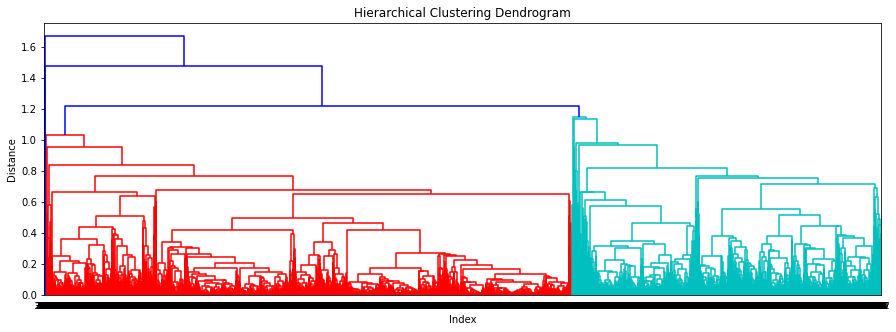

In [13]:
#p = np.array(df_norm) # converting into numpy array format 
H_cluster = linkage(EW_norm1, method="average",metric="euclidean") ## distance between the clusters , method= average 

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    H_cluster,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

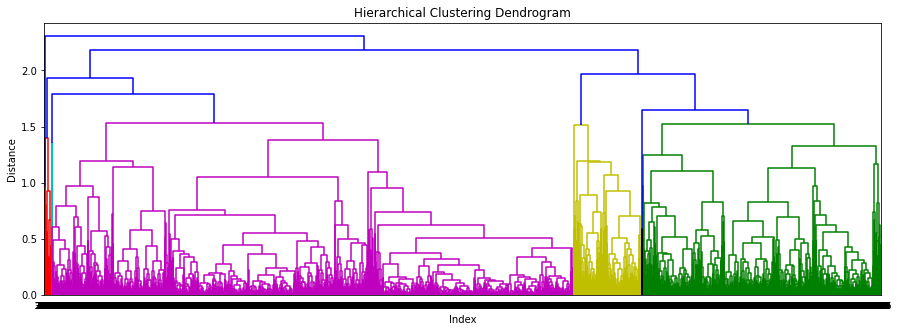

In [15]:
#p = np.array(df_norm) # converting into numpy array format 
H_cluster = linkage(EW_norm1, method="complete",metric="euclidean") ## distance between the clusters , method= complete

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    H_cluster,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    
)
plt.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(EW_norm1) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
EW['clust']=cluster_labels # creating a  new column and assigning it to new column 
EW

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
EW.iloc[:,1:].groupby(EW.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802,0.0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1.0
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000,2.0
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.0


# K-Means Clustering EastWestAirlines

In [20]:
EW_Air= pd.read_csv("EastWestAirlines.csv")
EW_Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [23]:
EW_Air_norm = norm_func(EW_Air.iloc[:,1:])

In [24]:
EW_Air_norm.head(10)  # Top 10 rows


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


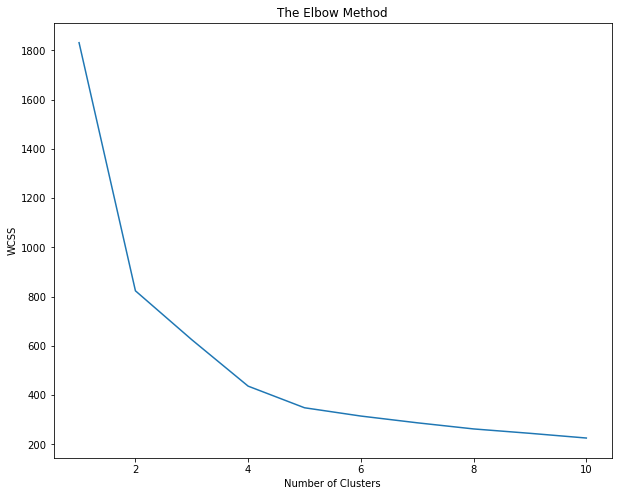

In [26]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(EW_Air_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [27]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(EW_Air_norm)

In [28]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([2, 2, 2, ..., 1, 0, 0])

In [29]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
EW_Air['cluster']=md # creating a  new column and assigning it to new column 
EW_Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [31]:
EW_Air.iloc[:,1:7].groupby(EW_Air.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
cluster,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
2,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245


Text(0.5, 1.0, 'Clusters using KMeans')

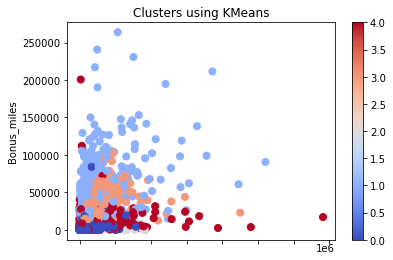

In [32]:
EW_Air.plot(x="Balance",y ="Bonus_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [37]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(EW_Air)
pred = kmeans.predict(EW_Air)
pred

array([1, 1, 1, ..., 2, 1, 1])

In [38]:
frame = pd.DataFrame(EW_Air)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    2502
2    1048
0     342
3      88
4      19
Name: cluster, dtype: int64